**Найти минимум функции одной переменной двумя методами: одним из методов нулевого порядка и одним из методов первого и второго порядка, проверив применимость метода к заданной функции. Для решения составить компьютерную программу на любом языке программирования.**

Вариант 3

$$f(x)=x2+3x(lnx−1),x∈[0.5,1]$$

**Проверка непрерывности функции**

- $x^2$ — непрерывна всюду.  
- $\ln x$ — непрерывна при $x > 0$, значит $3x(\ln x-1)$ непрерывна при $x>0$.  
- Сумма непрерывных функций непрерывна на пересечении их областей определения.  

**Вывод:** функция $f(x)$ непрерывна на интервале $[0.5,1]$, так как весь интервал лежит в области $x>0$.


Функция: x**2 + 3*x*(log(x) - 1)
Первая производная: 2*x + 3*log(x)
Вторая производная: 2 + 3/x


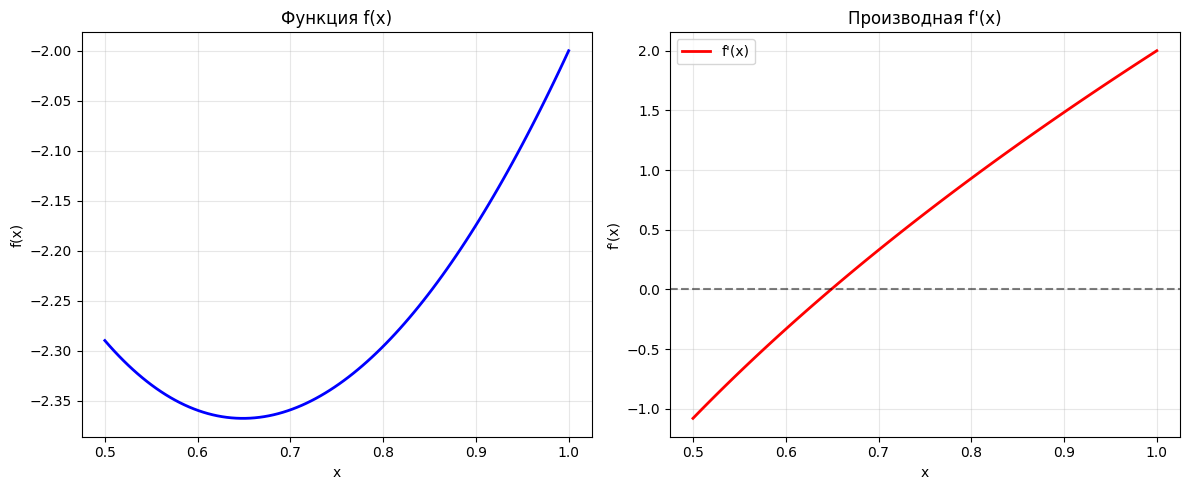

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd

x = sp.Symbol("x")
f_sym = x**2 + 3 * x * (sp.log(x) - 1)


f_der_sym = sp.diff(f_sym, x)
f_double_der_sym = sp.diff(f_der_sym, x)

print("Функция:", f_sym)
print("Первая производная:", f_der_sym)
print("Вторая производная:", f_double_der_sym)

f_lambd = sp.lambdify(x, f_sym, "numpy")
f_der_lambd = sp.lambdify(x, f_der_sym, "numpy")
f_double_der_lambd = sp.lambdify(x, f_double_der_sym, "numpy")

x = np.linspace(0.5, 1, 100)
y = f_lambd(x)
y_deriv = f_der_lambd(x)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y, "b-", linewidth=2)
plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Функция f(x)")

plt.subplot(1, 2, 2)
plt.plot(x, y_deriv, "r-", linewidth=2, label="f'(x)")
plt.axhline(y=0, color="k", linestyle="--", alpha=0.5) 
plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Производная f'(x)")
plt.legend()

plt.tight_layout()
plt.show()

**Функция унимодальна, выражен минимум. Можно взять метод золотого сечения - наиболее быстрый, при заданном отрезке и гарантированной унимодальности.**

Minimum at x = 0.6488442641762147
f(xmin) = -2.3675311092091733
Number of steps: 28

First 10 steps:
   Step         a         b        x1        x2     f(x1)     f(x2)
0     1  0.500000  1.000000  0.690983  0.809017 -2.361736 -2.286920
1     2  0.500000  0.809017  0.618034  0.690983 -2.364352 -2.361736
2     3  0.500000  0.690983  0.572949  0.618034 -2.347903 -2.364352
3     4  0.572949  0.690983  0.618034  0.645898 -2.364352 -2.367502
4     5  0.618034  0.690983  0.645898  0.663119 -2.367502 -2.366860
5     6  0.618034  0.663119  0.635255  0.645898 -2.366917 -2.367502
6     7  0.635255  0.663119  0.645898  0.652476 -2.367502 -2.367487
7     8  0.635255  0.652476  0.641833  0.645898 -2.367368 -2.367502
8     9  0.641833  0.652476  0.645898  0.648411 -2.367502 -2.367530
9    10  0.645898  0.652476  0.648411  0.649963 -2.367530 -2.367527


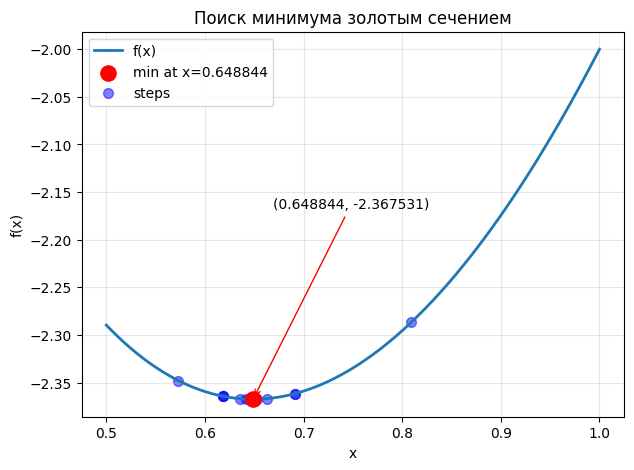

In [2]:
phi = (np.sqrt(5) + 1) / 2
resphi = 1 / phi

def golden_section_table(func=f_lambd, a=0.5, b=1.0, eps=1e-6, max_iter=10000):
    iterations = 0
    steps_x = []
    steps_y = []
    table = []

    x1 = b - resphi * (b - a)
    x2 = a + resphi * (b - a)

    y1 = func(x1)
    y2 = func(x2)

    while (b - a) > eps and iterations < max_iter:
        iterations += 1
        steps_x.extend([x1, x2])
        steps_y.extend([y1, y2])
        table.append([iterations, a, b, x1, x2, y1, y2])
        
        if y1 < y2:
            b = x2
            x2 = x1
            y2 = y1
            x1 = b - resphi * (b - a)
            y1 = func(x1)
        else:
            a = x1
            x1 = x2
            y1 = y2
            x2 = a + resphi * (b - a)
            y2 = func(x2)

    df = pd.DataFrame(table, columns=["Step", "a", "b", "x1", "x2", "f(x1)", "f(x2)"])
    return (a + b) / 2, steps_x, steps_y, df, iterations

xmin, steps_x, steps_y, df_steps, num_steps = golden_section_table()
print("Minimum at x =", xmin)
print("f(xmin) =", f_lambd(xmin))
print("Number of steps:", num_steps)

print("\nFirst 10 steps:")
print(df_steps.head(10))

xx = np.linspace(0.5, 1.0, 400)
yy = f_lambd(xx)

plt.figure(figsize=(7, 5))
plt.plot(xx, yy, linewidth=2, label="f(x)")
plt.scatter([xmin], [f_lambd(xmin)], s=120, color="red", zorder=5,
            label=f"min at x={xmin:.6f}")
plt.annotate(f"({xmin:.6f}, {f_lambd(xmin):.6f})",
             xy=(xmin, f_lambd(xmin)),
             xytext=(xmin + 0.02, f_lambd(xmin) + 0.2),
             arrowprops=dict(arrowstyle="->", color="red"))
plt.scatter(steps_x, steps_y, s=50, color="blue", alpha=0.5, label="steps")
plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Поиск минимума золотым сечением")
plt.legend()
plt.show()

**Метод касательной**

Minimum at x = 0.6488442252113407
f(xmin) = -2.367531109209202
Number of steps: 19

First 10 steps:
   Step         a         b         x      f(x)     f'(x)
0     1  0.500000  1.000000  0.730652 -2.345979  0.519850
1     2  0.500000  0.730652  0.610150 -2.362502 -0.261849
2     3  0.610150  0.730652  0.669150 -2.366175  0.133059
3     4  0.610150  0.669150  0.639332 -2.367230 -0.063330
4     5  0.639332  0.669150  0.654162 -2.367438  0.035124
5     6  0.639332  0.654162  0.646727 -2.367516 -0.014037
6     7  0.646727  0.654162  0.650440 -2.367523  0.010560
7     8  0.646727  0.650440  0.648582 -2.367531 -0.001735
8     9  0.648582  0.650440  0.649511 -2.367530  0.004413
9    10  0.648582  0.649511  0.649046 -2.367531  0.001340


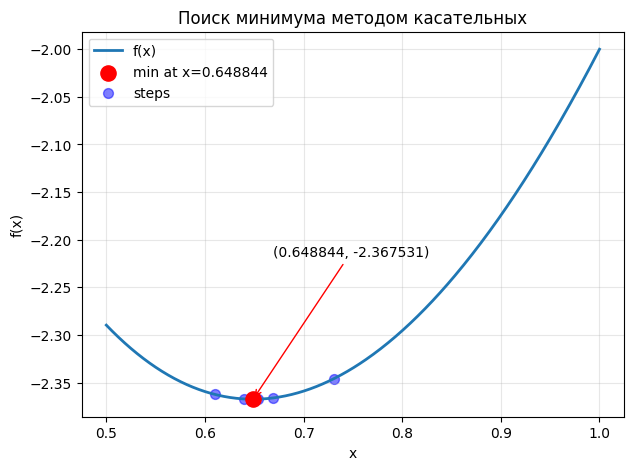

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def tangent_method_table(f, f_prime, a=0.5, b=1.0, eps=1e-6, max_iter=50):
    steps_x = []
    steps_y = []
    table = []

    fa, fpa = f(a), f_prime(a)
    fb, fpb = f(b), f_prime(b)

    for step in range(1, max_iter + 1):

        # точка пересечения касательных
        x = (fb - fa + a*fpa - b*fpb) / (fpa - fpb)
        fx = f(x)
        fpx = f_prime(x)

        steps_x.append(x)
        steps_y.append(fx)

        table.append([step, a, b, x, fx, fpx])

        # условие остановки
        if abs(fpx) < eps:
            df = pd.DataFrame(table, columns=["Step", "a", "b", "x", "f(x)", "f'(x)"])
            return x, steps_x, steps_y, df, step

        if np.sign(fpx) == np.sign(fpa):
            a = x
            fa, fpa = fx, fpx
        else:
            b = x
            fb, fpb = fx, fpx

    df = pd.DataFrame(table, columns=["Step", "a", "b", "x", "f(x)", "f'(x)"])
    return x, steps_x, steps_y, df, max_iter


xmin, steps_x, steps_y, df_steps, num_steps = tangent_method_table(f_lambd, f_der_lambd)

print("Minimum at x =", xmin)
print("f(xmin) =", f_lambd(xmin))
print("Number of steps:", num_steps)

print("\nFirst 10 steps:")
print(df_steps.head(10))

xx = np.linspace(0.5, 1.0, 400)
yy = f_lambd(xx)

plt.figure(figsize=(7, 5))
plt.plot(xx, yy, linewidth=2, label="f(x)")
plt.scatter([xmin], [f_lambd(xmin)], s=120, color="red", zorder=5,
            label=f"min at x={xmin:.6f}")

plt.annotate(f"({xmin:.6f}, {f_lambd(xmin):.6f})",
             xy=(xmin, f_lambd(xmin)),
             xytext=(xmin + 0.02, f_lambd(xmin) + 0.15),
             arrowprops=dict(arrowstyle="->", color="red"))

plt.scatter(steps_x, steps_y, s=50, color="blue", alpha=0.5, label="steps")

plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Поиск минимума методом касательных")
plt.legend()
plt.show()

**Метод Ньютона**

Minimum at x = 0.6488441332977222
f(xmin) = -2.36753110920923
Number of steps: 5

First 10 steps:
   Step         x      f(x)         f'(x)    f''(x)
0     1  0.800000 -2.295545  9.305693e-01  5.750000
1     2  0.750000 -2.334785  6.369538e-01  6.000000
2     3  0.700000 -2.359017  3.299752e-01  6.285714
3     4  0.650000 -2.367527  7.651252e-03  6.615385
4     5  0.648843 -2.367531 -4.754829e-06  6.623612
5     6  0.648844 -2.367531 -1.836087e-12  6.623607


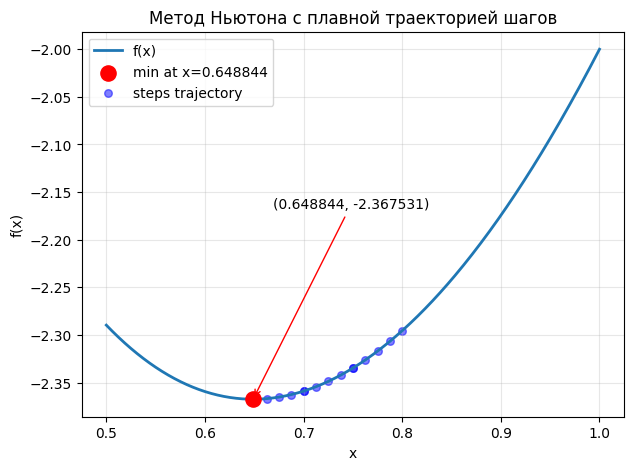

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def newton_method_table_smooth(f_prime, f_double_prime, x0=0.8, eps=1e-6, max_iter=100, max_step=0.05):
    x = x0
    iterations = 0
    steps_x = []
    steps_y = []
    table = []

    while iterations < max_iter:
        grad = f_prime(x)
        hess = f_double_prime(x)
        if abs(grad) < eps:
            break

        # классический шаг Ньютона
        delta = grad / hess

        # ограничиваем максимальный шаг для плавности
        if abs(delta) > max_step:
            delta = np.sign(delta) * max_step

        x_new = x - delta

        # Добавляем промежуточные точки для визуализации
        steps_x.extend(np.linspace(x, x_new, 5))
        steps_y.extend(f_lambd(np.linspace(x, x_new, 5)))

        # Сохраняем основной шаг в таблицу
        table.append([iterations+1, x, f_lambd(x), grad, hess])

        x = x_new
        iterations += 1

    # Финальный шаг
    steps_x.append(x)
    steps_y.append(f_lambd(x))
    table.append([iterations+1, x, f_lambd(x), f_prime(x), f_double_prime(x)])

    df = pd.DataFrame(table, columns=["Step", "x", "f(x)", "f'(x)", "f''(x)"])
    return x, steps_x, steps_y, df, iterations

xmin, steps_x, steps_y, df_steps, num_steps = newton_method_table_smooth(f_der_lambd, f_double_der_lambd)

print("Minimum at x =", xmin)
print("f(xmin) =", f_lambd(xmin))
print("Number of steps:", num_steps)

print("\nFirst 10 steps:")
print(df_steps.head(10))

# График
xx = np.linspace(0.5, 1.0, 400)
yy = f_lambd(xx)

plt.figure(figsize=(7,5))
plt.plot(xx, yy, linewidth=2, label="f(x)")
plt.scatter([xmin], [f_lambd(xmin)], s=120, color="red", zorder=5,
            label=f"min at x={xmin:.6f}")
plt.annotate(f"({xmin:.6f}, {f_lambd(xmin):.6f})",
             xy=(xmin, f_lambd(xmin)),
             xytext=(xmin + 0.02, f_lambd(xmin) + 0.2),
             arrowprops=dict(arrowstyle="->", color="red"))

# Синие точки шагов (плавные)
plt.scatter(steps_x, steps_y, s=30, color="blue", alpha=0.5, label="steps trajectory")

plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Метод Ньютона с плавной траекторией шагов")
plt.legend()
plt.show()
